In [7]:
#Analysis of TED Talks and what makes them effective 


#Import the below installed packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#Load Provided Datasets to analyse and store in below dataframes 

Ratings = pd.read_csv("ratings.csv")
Talk_Ratings = pd.read_csv("talk_ratings.csv")
Ted = pd.read_csv('ted.csv')
Tags = pd.read_csv("ted_tags.csv")

In [9]:
#Get Familar with datasets and summary statistics of contents contained in each one

print(Ted.describe())
print(Ratings.describe())
print(Talk_Ratings.describe())
print(Tags.describe())

        Unnamed: 0     comments     duration     film_date    languages  \
count  2550.000000  2550.000000  2550.000000  2.550000e+03  2550.000000   
mean   1275.500000   191.562353   826.510196  1.321928e+09    27.326275   
std     736.265917   282.315223   374.009138  1.197391e+08     9.563452   
min       1.000000     2.000000   135.000000  7.464960e+07     0.000000   
25%     638.250000    63.000000   577.000000  1.257466e+09    23.000000   
50%    1275.500000   118.000000   848.000000  1.333238e+09    28.000000   
75%    1912.750000   221.750000  1046.750000  1.412964e+09    33.000000   
max    2550.000000  6404.000000  5256.000000  1.503792e+09    72.000000   

       num_speaker  published_date         views  
count  2550.000000    2.550000e+03  2.550000e+03  
mean      1.028235    1.343525e+09  1.698297e+06  
std       0.207705    9.464009e+07  2.498479e+06  
min       1.000000    1.151367e+09  5.044300e+04  
25%       1.000000    1.268463e+09  7.557928e+05  
50%       1.000000

In [106]:
#Start by investigating the most popular Ted Talks.

Ted.sort_values('views',ascending=False).head(10)

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,title,url,views,dis_quo,year,month
0,1,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006,6
1346,1347,2290,"Body language affects how others see us, but i...",1262,TEDGlobal 2012,2012-06-26,51,Amy Cuddy,Amy Cuddy: Your body language may shape who yo...,1,2012-10-01 15:00:08,Social psychologist,Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...,43155405,0.000053,2012,10
677,678,1930,Simon Sinek has a simple but powerful model fo...,1084,TEDxPuget Sound,2009-09-17,45,Simon Sinek,Simon Sinek: How great leaders inspire action,1,2010-05-04 09:31:00,Leadership expert,How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...,34309432,0.000056,2010,5
837,838,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,2010-06-06,52,Brené Brown,Brené Brown: The power of vulnerability,1,2010-12-23 14:45:00,Vulnerability researcher,The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,0.000062,2010,12
452,453,354,"""Bonk"" author Mary Roach delves into obscure s...",1003,TED2009,2009-02-06,37,Mary Roach,Mary Roach: 10 things you didn't know about or...,1,2009-05-20 01:00:00,Writer,10 things you didn't know about orgasm,https://www.ted.com/talks/mary_roach_10_things...,22270883,0.000016,2009,5
1776,1777,297,"Have you ever felt like you're talking, but no...",598,TEDGlobal 2013,2013-06-10,45,Julian Treasure,Julian Treasure: How to speak so that people w...,1,2014-06-27 14:38:17,Sound consultant,How to speak so that people want to listen,https://www.ted.com/talks/julian_treasure_how_...,21594632,0.000014,2014,6
201,202,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,2008-02-27,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,2008-03-12 01:10:00,Neuroanatomist,My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883,0.000136,2008,3
5,6,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,2006-02-02,36,Tony Robbins,Tony Robbins: Why we do what we do,1,2006-06-27 20:38:00,Life coach; expert in leadership psychology,Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,0.000032,2006,6
2114,2115,150,"Suspicious emails: unclaimed insurance bonds, ...",588,TEDGlobal>Geneva,2015-12-08,43,James Veitch,James Veitch: This is what happens when you re...,1,2016-01-08 16:03:40,Comedian and writer,This is what happens when you reply to spam email,https://www.ted.com/talks/james_veitch_this_is...,20475972,0.000007,2016,1
1416,1417,846,Cameron Russell admits she won “a genetic lott...,577,TEDxMidAtlantic,2012-10-27,43,Cameron Russell,Cameron Russell: Looks aren't everything. Beli...,1,2013-01-16 16:05:54,Model,"Looks aren't everything. Believe me, I'm a model.",https://www.ted.com/talks/cameron_russell_look...,19787465,0.000043,2013,1


In [97]:
#Test 1 
#Investigate the relationship between the number of comments and views a talk gets - is there a relationship between views and comments
#and does it contribute to making the video popular 
#Invesitage comments and views 

Ted['comments'].describe()

#On average, there are 191.5 comments on every TED Talk. This proves people are highly interacting with TED talks-hence 
#task is how to use the platform intuitevly to generate maximum impact 


Ted['views'].describe()

#The average number of views on TED Talks in 1.6 million. and the median number of views is 1.12 million. This suggests a very high average level of popularity of TED Talks


count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

Text(0.5, 1.0, 'Views per Talk')

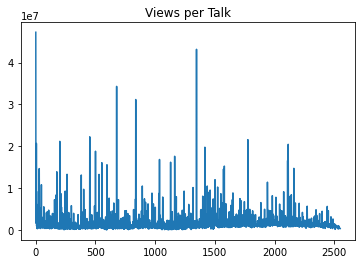

In [100]:
#Check  correlation between views and comments as we are trying to analyse what makes a video get most views

#Calculate Mean views
views_mean = Ted['views'].mean()
views_mean

#Calculate Median views

views_median = Ted['views'].median()
views_median

#Calculate Standard distribution views
views_std = Ted['views'].std()
views_std


#Check distribution of views using graph
plt.plot(Ted.views)
plt.title("Views per Talk")

Text(0.5, 1.0, 'Comments per Talk')

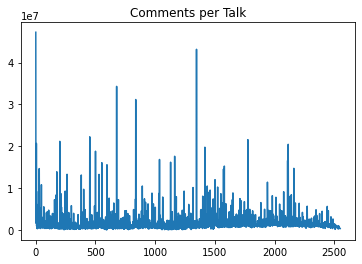

In [11]:
#Repeat same tests for 'comments'
#Calculate the mean
comment_mean = Ted['comments'].mean()
comment_mean

#Calculate the median
comment_median = Ted['comments'].median() 
comment_median


#Calculate standard deviation
comment_std = Ted['comments'].std()
comment_std

comment_cv = comment_std / comment_mean
comment_cv

#Check distribution using graph
plt.plot(Ted.views)
plt.title("Comments per Talk")

In [ ]:
#Check correlation between views and comments
Ted[['views', 'comments']].corr()

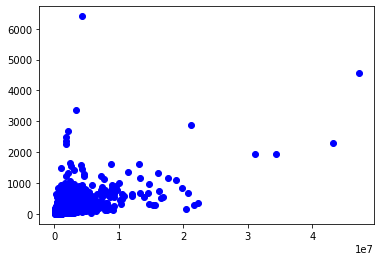

In [25]:
#Visually show correlation on scatterplot

fig, ax1 = plt.subplots()
x = [Ted['views']];
y = [Ted['comments']]
ax1.plot(x, y, 'bo')
plt.show()



In [ ]:
#Conclusion: There is a relationship between views and comments correlation: 0.530939 this suggest that views and comments are related
#however more noteably the investigation into views and comments has proven TED talks generate big impact so if used  effectively
# a TED talk can interact and influence a large majority of the population 

In [98]:
#Check most popular talks # Therefore we must answer what makes a talk popular?
#Test 2: What Impact does language have on views? Does the more languages you convert a talk to imapct the amount of views

Ted.sort_values('views',ascending=False).head(10)
Ted['languages'].describe()
#On average, a TED Talk is available in 27 different languages. The maximum number of languages a TED Talk is available is 72.

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [99]:
#Check the talk which has been translated into the most languages 

Ted[Ted['languages'] == 72]
# This talk has been viewed 8,838,874 times which is above the average 1698297.4815686275 


,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,title,url,views,dis_quo,year,month
973,974,736,"Is there something you've always meant to do, ...",207,TED2011,2011-03-03,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,2011-07-01 15:14:00,Technologist,Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,2011,7


In [105]:
#Test Correlation of the below 
Ted[['views', 'languages']].corr()

,views,languages
views,1.000000,0.377623
languages,0.377623,1.000000


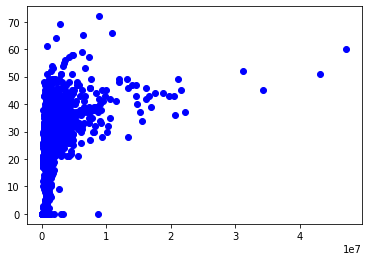

In [104]:
#Graphical Representation of views and languages

fig, ax1 = plt.subplots()
x = [Ted['views']];
y = [Ted['languages']]
ax1.plot(x, y, 'bo')
plt.show()

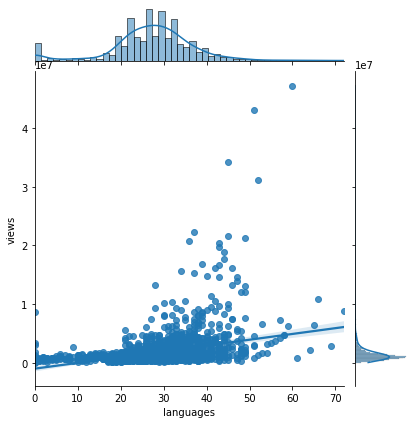

In [107]:
#Does number of views increase based on number of languages ?
#Joint Plot

sns.jointplot(x=Ted['languages'], y=Ted['views'], kind='reg')

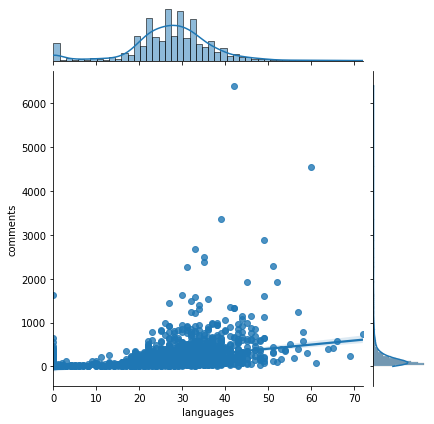

In [108]:
#Does number of languages generate more comments and potentially more views
sns.jointplot(x=Ted['languages'], y=Ted['comments'], kind='reg')

In [ ]:
 #Conclusion there is a strong relationship between languages and views the more languages you translate your Talk to the larger amount of views it will get 

In [14]:
#Test 3: Does the subject matter determine the reach of the Talk? 
#We will look at the ratio of comments to views

Ted['dis_quo'] = Ted['comments']/Ted['views']

#Half of the talks in the top 10 are on the lines of Faith and Religion. It can be assumed that suject matter has an impact on views.

Ted[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)


,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,1259712000
803,E-voting without fraud,David Bismark,543551,834,0.001534,1279065600
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,1012608000
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,1265760000
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,1299110400
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,1286668800
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,1291766400
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,1395100800
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,1265846400
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,1257292800


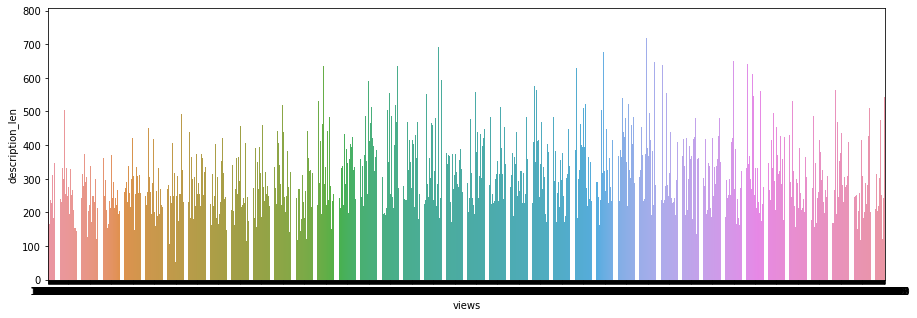

In [126]:
#When we look at description length, it is harder to see a direct correlation. But a more detailed description ( higher description lengths) results in more views.

Ted['description_len']=Ted['description'].apply(lambda x: len(x))
plt.figure(figsize=(15,5))
sns.barplot(x='views', y='description_len', data=Ted)
plt.show()

In [128]:
#Analyse the tags used for Ted Talks
Tags['tags']

0             children
1           creativity
2              culture
3                dance
4            education
             ...      
19149             play
19150     publicspaces
19151          society
19152         software
19153    urbanplanning
Name: tags, Length: 19154, dtype: object

In [16]:
#Test 4 Investigate the most popular month for uploading Ted talks
#change film_date and publish_date to correct date format to allow us to analyse this

import datetime
Ted['film_date'] = Ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
Ted['published_date'] = Ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

<AxesSubplot:xlabel='month', ylabel='talks'>

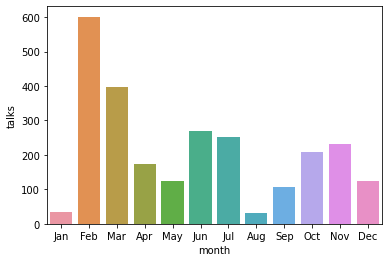

In [23]:
#Investigate most popular months for TED TALK 
#Create list month_order for months of the year
#Create list day_order to store days of week 

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


Ted['month'] = Ted['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])



month_Ted = pd.DataFrame(Ted['month'].value_counts()).reset_index()
month_Ted.columns = ['month', 'talks']


#Bar plot investigating the relationship between months and talks 

sns.barplot(x='month', y='talks', data=month_Ted, order=month_order)

In [ ]:
#Conclusion February is  the most popular month for TED Conferences whereas  January are the least popular.

In [24]:
#Recheck most popular month for Ted X talks

Ted_x = Ted[Ted['event'].str.contains('TEDx')]
x_month_Ted = pd.DataFrame(Ted_x['month'].value_counts().reset_index())
x_month_Ted.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

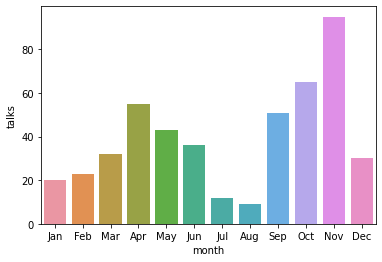

In [25]:
#Use bar plot to graphically represent 
sns.barplot(x='month', y='talks', data=x_month_Ted, order=month_order)

In [ ]:
# November is most popular for Ted X talks 

In [26]:
#Now we know the most popular month we must investigate most popular day

def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [27]:
#use file_date column for this 
Ted['day'] = Ted['film_date'].apply(getday)

In [28]:
#Check most popular day of the week 
day_Ted = pd.DataFrame(Ted['day'].value_counts()).reset_index()
day_Ted.columns = ['day', 'talks']

<AxesSubplot:xlabel='day', ylabel='talks'>

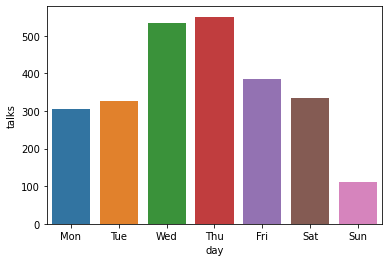

In [29]:
#Graphically represent days of week on bar chart
sns.barplot(x='day', y='talks', data=day_Ted, order=day_order)

In [ ]:
#Wednesday and Thursday being the most popular days and Sunday being the least popular.
#Conclusion of Test 4 - the most popular time to upload a talk in the hope of generating max impact is on a Thursday (most pop day)
#in Feburary (most popular month)

In [15]:
#Test 5 #Does speaker influence the success of a talk 

speaker = Ted.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker.columns = ['main_speaker', 'appearances']
speaker = speaker.sort_values('appearances', ascending=False)
speaker.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [16]:
#Hans Rosling, is  the most popular TED Speakers however we must investigate if occupation matters in relation to
#who give ted talks
#Does occupation for TED speakers matter? I.e do  speakers of some professions generate more views

occupation_df = Ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)


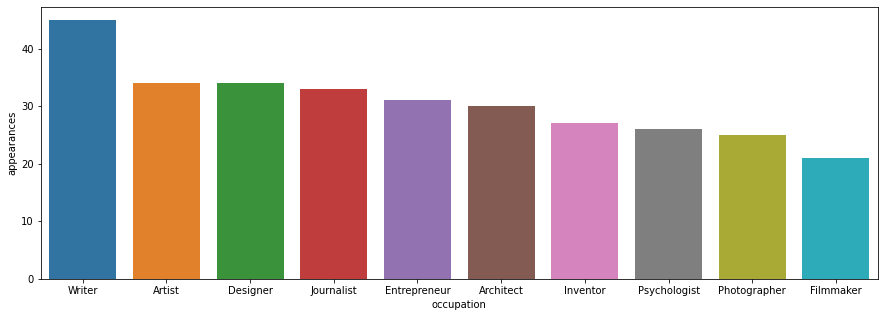

In [32]:
#Writer is the most popular

plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

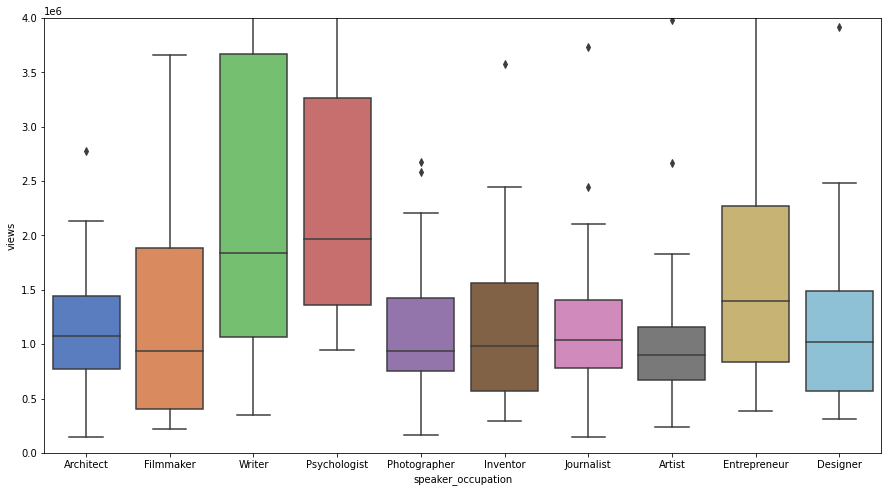

In [33]:
#Do some occupations get more views than others?
#Use below boxplot graphs to determine this 

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=Ted[Ted['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

In [ ]:
#Conclusion Test 5 Psychologists tend to get the most views. 

In [40]:
#Test 6 Does the Duration of a Ted Talk Matter
#Does duration of talk have an impact on views?

Ted['duration'] = Ted['duration']/60
Ted['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [41]:
#compare shortest and longest talk

#shortest

Ted[Ted['duration'] == 2.25]

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,title,url,views
239,240,76,After speaking at TED2007 on elegance in physi...,2.25,TED2007,1172880000,61,Murray Gell-Mann,Murray Gell-Mann: The ancestor of language,1,1213146000,Physicist,The ancestor of language,https://www.ted.com/talks/murray_gell_mann_on_...,785293


In [42]:
#Longest talk
Ted[Ted['duration'] == 87.6]

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,speaker_occupation,title,url,views
640,641,101,"Blind river dolphins, reclusive lemurs, a parr...",87.6,University of California,989971200,0,Douglas Adams,"Douglas Adams: Parrots, the universe and every...",1,1268762040,"Author, satirist","Parrots, the universe and everything",https://www.ted.com/talks/douglas_adams_parrot...,473220


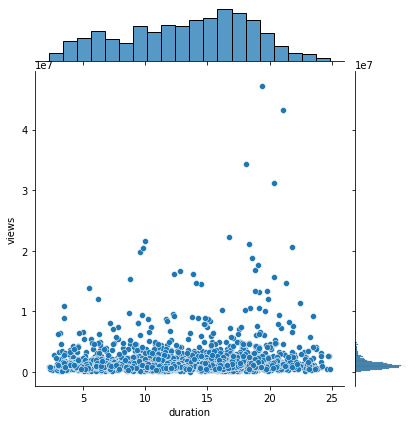

In [43]:
#Let us now check for any correlation between the popularity and the duration of a TED Talk

sns.jointplot(x='duration', y='views', data=Ted[Ted['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()


In [ ]:
#There doesnt appear to be a relationship between duration and number of views

In [ ]:
#Conclusion 
#Summarise what contributes to a successful Ted Talk

#Views - There is correlation between views and comments you must generate maximum impact by getting the most views. The following
#will help to generate most views for a video 

#Day of week/month Talk is uploaded: The day the talk is held on is related to the amount of views the talk will get. 
#To get max impact the talk should be held in Feburary on a Thursday. The above analysis in Test 4 proves this. 

#Occupation of speaker
#There is a difference in the amount of views talks get dependant on the occupation of speaker psychologists tend to get more views.
#Test 5 shows the analysis for this

#Duration of Talk
#Duration of talk does not seem to imapct the views a talk generates

#Topic of talk and Languages
#The more languages a talk is translated to the mosre views that will be generated.

#Final conclusion Based on Analysis 

#Based on The NGO should srcuture their talks in the following way 
#They should chose a  topic that has prvoen in the past to generate a large amount of views 
#eg religion and a speaker that is a psychologist. They should also translate the talk into as many languages as 
#possible to reach as wide audience as possible. The talk should be held on a Thursday in September and this should give the 
#NGO the maximum chance of generate the most views. 


